# Abstract


Electrocardiography (ECG) plays a crucial role in the early diagnosis and monitoring of cardiovascular diseases, including arrhythmias, which are irregularities in heart rhythm. This project leverages the MIT-BIH Arrhythmia Database to develop a robust signal classification model capable of accurately identifying different types of arrhythmias from ECG data. The project focuses on preprocessing and feature extraction from raw ECG signals, followed by implementing a Recurrent Neural Network (RNN) model, specifically using Long Short-Term Memory (LSTM) layers, to capture temporal dependencies in the signals. By training and evaluating the model on annotated ECG data from the MIT-BIH database, this work aims to improve the accuracy and efficiency of arrhythmia detection. The outcomes of this research have potential applications in real-time cardiac monitoring systems, enabling more effective, automated, and early detection of heart abnormalities, ultimately contributing to better patient outcomes.

# Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPooling1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report, confusion_matrix

# Read Data

In [5]:
train_data = pd.read_csv(r'mitbih_train.csv',header=None)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
test_data = pd.read_csv(r'mitbih_test.csv',header=None)
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print(f"train data size: {train_data.shape}")
print(f"test data size: {test_data.shape}")

train data size: (87554, 188)
test data size: (21892, 188)


In [8]:
pd.set_option('display.max_rows', None)
print(train_data.isna().sum())

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

# EDA

In [9]:
# See the number of each class in train dataset
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}


value_counts = train_data.iloc[:,-1].value_counts().rename(labels)

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label in The Train Dataset")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

In [10]:
# See the number of each class in test dataset
value_counts_test = test_data.iloc[:,-1].value_counts().rename(labels)

pie_fig = px.pie(names=value_counts_test.index, values=value_counts_test.values,
                 title="The Percentage of Each Label in The Test Dataset")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

In [11]:
ecg_0 = train_data.loc[train_data[187]==0, :].iloc[1,:187]
ecg_1 = train_data.loc[train_data[187]==1, :].iloc[1,:187]
ecg_2 = train_data.loc[train_data[187]==2, :].iloc[1,:187]
ecg_3 = train_data.loc[train_data[187]==3, :].iloc[1,:187]
ecg_4 = train_data.loc[train_data[187]==4, :].iloc[1,:187]

ecg_df = pd.DataFrame({'Normal': ecg_0,
                       'Artial Premature': ecg_1,
                       'Premature ventricular contraction': ecg_2,
                       'Fusion of ventricular and normal': ecg_3,
                       'Fusion of paced and normal': ecg_4})
ecg_plot = px.line(ecg_df,
                  labels={'index':'Time Intervals', 'value':'Amplitude (mV)', 'variable':'Categories'},
                  title="One ECG form Each Category")
ecg_plot.update_layout(title_x=0.25, width=1000, height=500)
ecg_plot.show()

# Handle unbalanced 

In [12]:
data = train_data.iloc[:,:187]
labels = train_data.iloc[:,187]
# Initialize RandomOverSampler
ovrs = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ovrs.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [13]:
classes = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(classes)

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

pie_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.show()

# Split 

In [14]:
# Split to features , target
x = train_df.iloc[:,:187]
y = train_df.iloc[:,187]

x_test = test_data.iloc[:,:187]
y_test = test_data.iloc[: ,187]

In [15]:
# Split train data to train & validation
x_train , x_val , y_train , y_val = train_test_split(x,y ,test_size = 0.2 ,random_state = 42 ,stratify=train_df.iloc[:, 187] )

In [16]:
print(f"train data size: {x_train.shape}")
print(f"validation data size: {x_val.shape}")
print(f"test data size: {x_test.shape}")

train data size: (289884, 187)
validation data size: (72471, 187)
test data size: (21892, 187)


To reduce dimention i will use Conv1d , BatchNormalization , maxpooling so i will reshape the data 

In [17]:
# Reshape datasets to use them in CNN 
x_train = x_train.values.reshape(x_train.shape[0], -1, 1)
x_val = x_val.values.reshape(x_val.shape[0], -1, 1)
x_test = x_test.values.reshape(x_test.shape[0], -1, 1)

In [18]:
y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [19]:
# Check the dataset dimensions again 
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


# ANN

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score

In [ ]:
#Parámetros
tasa_aprendizaje = 0.001
numero_epocas = 30

dimension_entrada = x_train.shape[1]  # Dimensión de entrada
num_clases = y_train.shape[1]  # Número de clases de salida

optimizador = Adam(learning_rate=tasa_aprendizaje)

In [53]:
#Creación del modelo ann

ann = Sequential([
    Dense(128, activation='relu', input_shape=(dimension_entrada,)),  # Capa de entrada
    
    Dropout(0.3),
    Dense(128, activation='relu'),  # Segunda capa densa
    Dropout(0.3), 
    Dense(64, activation='relu'),  # Segunda capa densa
    Dropout(0.3),
    Dense(32, activation='relu'),  # Tercera capa densa

    Dense(num_clases, activation='softmax')  # Capa de salida
])

ann.summary()

c:\Users\Dav1d\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        24,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,077 (199.52 KB)

 Trainable params: 51,077 (199.52 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
#Compilación del modelo CNN

ann.compile(optimizer=optimizador, loss="categorical_crossentropy", metrics=["accuracy"])

In [55]:
#Entrenamiento del modelo cnn

history_ann = ann.fit(x = x_train, y = y_train, batch_size=32, epochs=numero_epocas, validation_data=(x_val, y_val))


Epoch 1/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7932 - loss: 0.5513 - val_accuracy: 0.9248 - val_loss: 0.2087
Epoch 2/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 9s 945us/step - accuracy: 0.9027 - loss: 0.2666 - val_accuracy: 0.9448 - val_loss: 0.1527
Epoch 3/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 9s 945us/step - accuracy: 0.9206 - loss: 0.2211 - val_accuracy: 0.9557 - val_loss: 0.1307
Epoch 4/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 9s 992us/step - accuracy: 0.9290 - loss: 0.1983 - val_accuracy: 0.9622 - val_loss: 0.1131
Epoch 5/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 8s 932us/step - accuracy: 0.9347 - loss: 0.1838 - val_accuracy: 0.9648 - val_loss: 0.1042
Epoch 6/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 8s 933us/step - accuracy: 0.9398 - loss: 0.1709 - val_accuracy: 0.9690 - val_loss: 0.0961
Epoch 7/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 9s 939us/step - accuracy: 0.9432 - loss: 0.1621 - val_accuracy: 0.9710 - val_loss: 0.0906
Epoch 8/30
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 8s 935us/step - accuracy: 0.9459 - 

In [56]:
# Evaluación en el conjunto de prueba
test_loss, test_accuracy = ann.evaluate(x_test, y_test)
print(f"Loss en prueba: {test_loss}")
print(f"Precisión en prueba: {test_accuracy}")

# Guardar el modelo
ann.save('modelo_ann_2.h5')

685/685 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.9595 - loss: 0.1072


Loss en prueba: 0.13511332869529724
Precisión en prueba: 0.9567878842353821


In [71]:
#guardar el historial
import json

with open('history_ann.json', 'w') as f:
    json.dump(history_ann.history, f)

# CNN

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Softmax
from keras.optimizers import Adam


In [28]:
#parámetros

tasa_aprendizaje = 0.001
numero_epocas = 30
tamanio_kernel = 3
batch_size = 30 

dimension_entrada = x_train.shape[1]  # Dimensión de entrada
num_clases = y_train.shape[1]  # Número de clases de salida

optimizador = Adam(learning_rate=tasa_aprendizaje)

In [ ]:
#Creación del modelo cnn

cnn = Sequential([
    # Primera capa convolucional
    Conv1D(filters=32, kernel_size=tamanio_kernel, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Segunda capa convolucional
    Conv1D(filters=64, kernel_size=tamanio_kernel, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Tercera capa convolucional
    Conv1D(filters=128, kernel_size=tamanio_kernel, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Aplanamiento
    Flatten(),

    # Capa completamente conectada
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Capa de salida
    Dense(y_train.shape[1], activation='softmax')  # Asumiendo y_train codificado como one-hot
])

c:\Users\Dav1d\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [30]:
#compilación del modelo cnn

cnn.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 185, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 92, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 90, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 43, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 43, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2688)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       344,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,773 (1.44 MB)

 Trainable params: 376,325 (1.44 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
#Entrenamiento 

history_cnn = cnn.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=numero_epocas,
    batch_size=batch_size,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ]
)

Epoch 1/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 74s 7ms/step - accuracy: 0.8217 - loss: 0.5004 - val_accuracy: 0.9595 - val_loss: 0.1127 - learning_rate: 0.0010
Epoch 2/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9292 - loss: 0.1961 - val_accuracy: 0.9713 - val_loss: 0.0821 - learning_rate: 0.0010
Epoch 3/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9461 - loss: 0.1491 - val_accuracy: 0.9818 - val_loss: 0.0557 - learning_rate: 0.0010
Epoch 4/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.9540 - loss: 0.1275 - val_accuracy: 0.9812 - val_loss: 0.0566 - learning_rate: 0.0010
Epoch 5/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 71s 7ms/step - accuracy: 0.9602 - loss: 0.1120 - val_accuracy: 0.9769 - val_loss: 0.0646 - learning_rate: 0.0010
Epoch 6/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9643 - loss: 0.1022 - val_accuracy: 0.9872 - val_loss: 0.0386 - learning_rate: 0.0010
Epoch 7/30
9663/9663 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9

In [ ]:
# Evaluación del modelo
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

cnn.save('modelo_cnn_2.h5')

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0628


Test Loss: 0.08827745169401169, Test Accuracy: 0.977160632610321


In [72]:
#guardar el historial
import json

with open('history_cnn.json', 'w') as f:
    json.dump(history.history, f)

# RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [40]:
#parámetros

tasa_aprendizaje = 0.001
numero_epocas = 30
batch_size = 64 

dimension_entrada = x_train.shape[1]  # Dimensión de entrada
num_clases = y_train.shape[1]  # Número de clases de salida

optimizador = Adam(learning_rate=tasa_aprendizaje)

In [37]:
#Creación del modelo rnn

rnn = Sequential([
    #primera capa LSTM con Dropout
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dropout(0.2),

    #segunda capa LSTM con Dropout
    LSTM(64, return_sequences=True),
    Dropout(0.2),

    #tercera capa LSTM con Dropout
    LSTM(32),
    Dropout(0.2),

    #Capa de salida
    Dense(num_clases, activation='softmax')
])


c:\Users\Dav1d\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [38]:
#Compilación del modelo rnn

rnn.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics=['accuracy'])
rnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 187, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 187, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 187, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 187, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,549 (502.14 KB)

 Trainable params: 128,549 (502.14 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Entrenamiento del modelo

history_rnn = rnn.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=numero_epocas,
                    batch_size=batch_size,
                    callbacks = [
                        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
                        #ModelCheckpoint('best_model.h5', save_best_only=True),
                        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
                    ]
)

Epoch 1/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 765s 168ms/step - accuracy: 0.5689 - loss: 1.0849 - val_accuracy: 0.6718 - val_loss: 0.8410 - learning_rate: 0.0010
Epoch 2/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 770s 170ms/step - accuracy: 0.4851 - loss: 1.1769 - val_accuracy: 0.2805 - val_loss: 1.5471 - learning_rate: 0.0010
Epoch 3/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 819s 181ms/step - accuracy: 0.2482 - loss: 1.5573 - val_accuracy: 0.3345 - val_loss: 1.5339 - learning_rate: 0.0010
Epoch 4/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 878s 194ms/step - accuracy: 0.4879 - loss: 1.2404 - val_accuracy: 0.6427 - val_loss: 0.9117 - learning_rate: 0.0010
Epoch 5/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 902s 199ms/step - accuracy: 0.7409 - loss: 0.6971 - val_accuracy: 0.8071 - val_loss: 0.5148 - learning_rate: 5.0000e-04
Epoch 6/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 913s 201ms/step - accuracy: 0.8044 - loss: 0.5354 - val_accuracy: 0.8345 - val_loss: 0.4647 - learning_rate: 5.0000e-04
Epoch 7/30
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 95

In [ ]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = rnn.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

rnn.save('modelo_rnn_2.h5')

Test Accuracy: 0.95


In [73]:
#guardar el historial
import json

with open('history_rnn.json', 'w') as f:
    json.dump(history_rnn.history, f)

# Evaluación y Métricas

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

In [106]:
# Cargar los historiales

with open('history_ann.json', 'r') as f:
    history_ann = json.load(f)

with open('history_cnn.json', 'r') as f:
    history_cnn = json.load(f)

with open('history_rnn.json', 'r') as f:
    history_rnn = json.load(f)

print(history_ann.keys())
print(history_cnn.keys())
print(history_rnn.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [110]:
def evaluar_modelo(archivo_modelo, x_test, y_test, x_val, y_val, history):
    # Cargar el modelo guardado
    modelo = load_model(archivo_modelo)

    # Evaluar el modelo en el conjunto de prueba
    y_pred_test = np.argmax(modelo.predict(x_test), axis=1)
    y_true_test = np.argmax(y_test, axis=1)

    # Generar la matriz de confusión
    matriz_confusion = confusion_matrix(y_true_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion,
                                   display_labels=["Normal", "Artial Premature", 
                                                   "PVC", "Fusion Ventricular", 
                                                   "Fusion Paced"])
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
    plt.title("Matriz de Confusión (Prueba)")
    plt.show()

    # Evaluación en el conjunto de validación
    val_loss, val_accuracy = modelo.evaluate(x_val, y_val, verbose=0)
    y_pred_val = np.argmax(modelo.predict(x_val), axis=1)
    y_true_val = np.argmax(y_val, axis=1)

    # Clasificación detallada
    reporte_val = classification_report(y_true_val, y_pred_val, output_dict=True)
    precision = reporte_val["weighted avg"]["precision"]
    f1_score = reporte_val["weighted avg"]["f1-score"]

    # Crear una tabla de métricas con Matplotlib
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis('tight')
    ax.axis('off')

    tabla = pd.DataFrame({
        "Métrica": ["Accuracy", "Precisión", "F1-score", "Loss"],
        "Valor": [f"{val_accuracy:.4f}", f"{precision:.4f}", f"{f1_score:.4f}", f"{val_loss:.4f}"]
    })

    table = ax.table(cellText=tabla.values, colLabels=tabla.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title("Métricas de Validación", fontsize=14)
    plt.show()

    # Graficar precisión y pérdida
    plt.figure(figsize=(6, 5))
    plt.title('Evolución del modelo')
    plt.xlabel('Épocas')
    plt.ylabel('Porcentaje')

    # Precisión
    plt.plot(history['accuracy'], label='Precisión(entrenamiento)')
    plt.plot(history['val_accuracy'], label='Precisión(validación)')

    # Pérdida
    plt.plot(history['loss'], label='Pérdida(entrenamiento)')
    plt.plot(history['val_loss'], label='Pérdida(validación)')

    plt.tight_layout()
    plt.legend()
    plt.show()

# RNN

685/685 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step


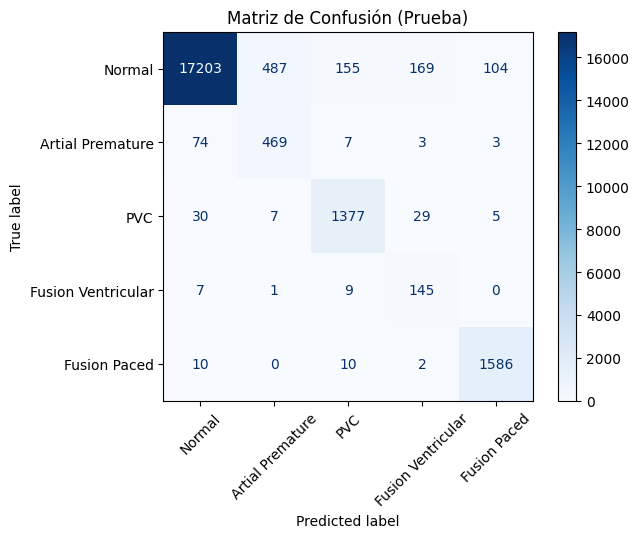

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 75s 33ms/step


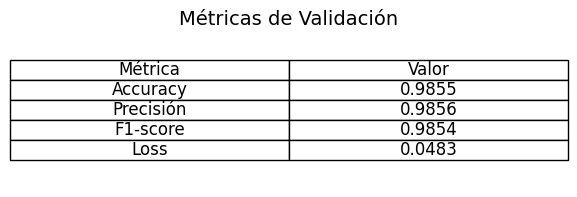

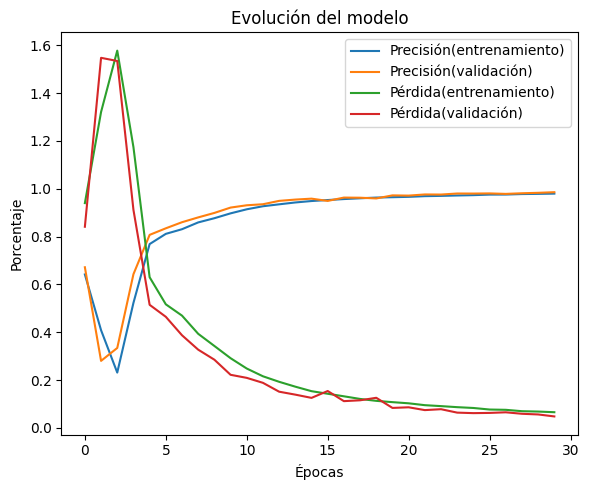

In [111]:
evaluar_modelo('modelo_rnn.h5', x_test, y_test, x_val, y_val, history_rnn)

# CNN

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


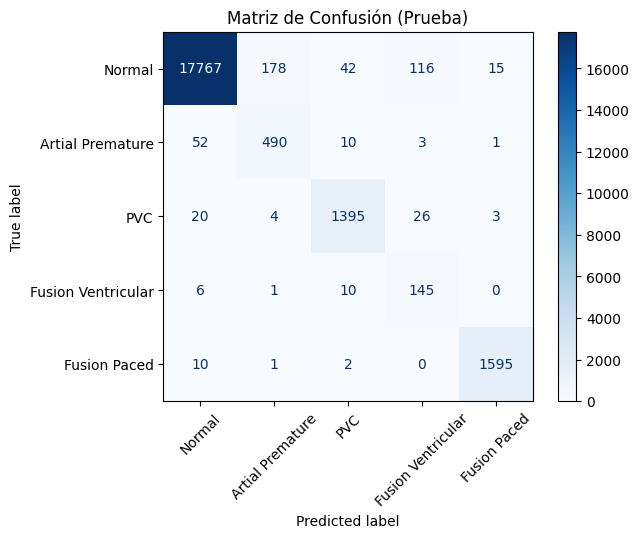

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


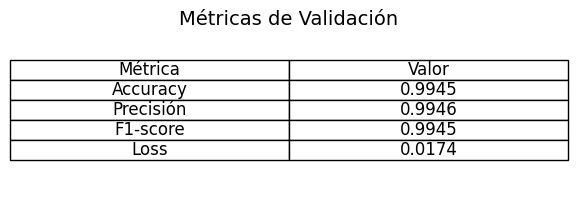

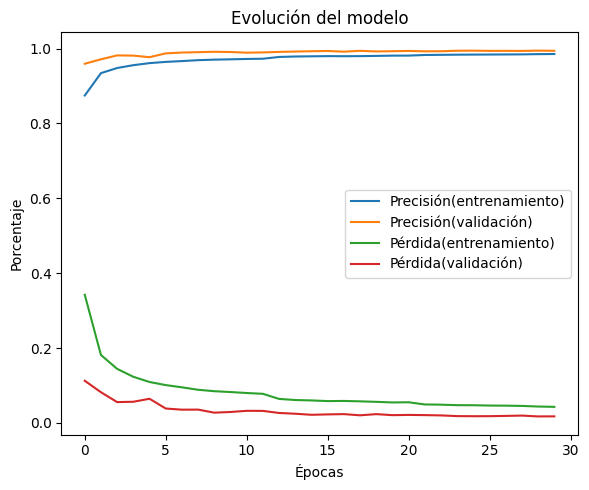

In [112]:
evaluar_modelo('modelo_cnn.h5', x_test, y_test, x_val, y_val, history_cnn)

# ANN

685/685 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step


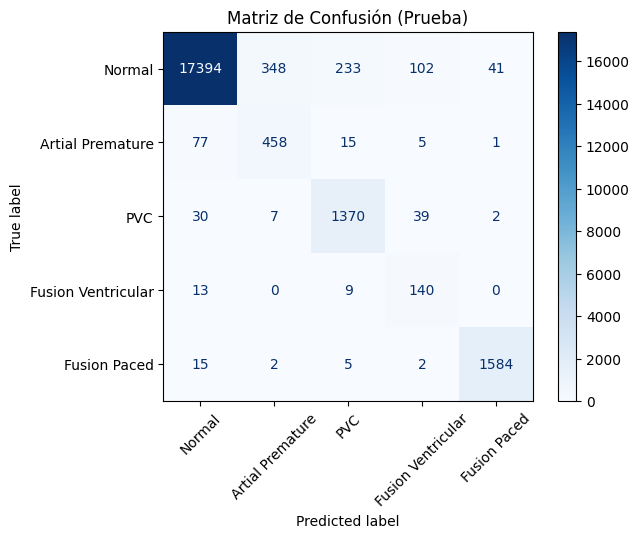

2265/2265 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step


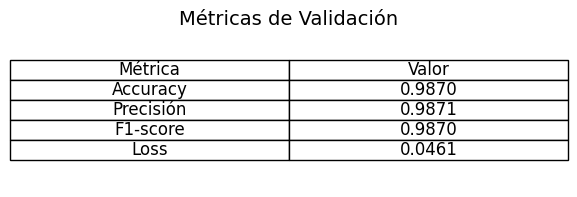

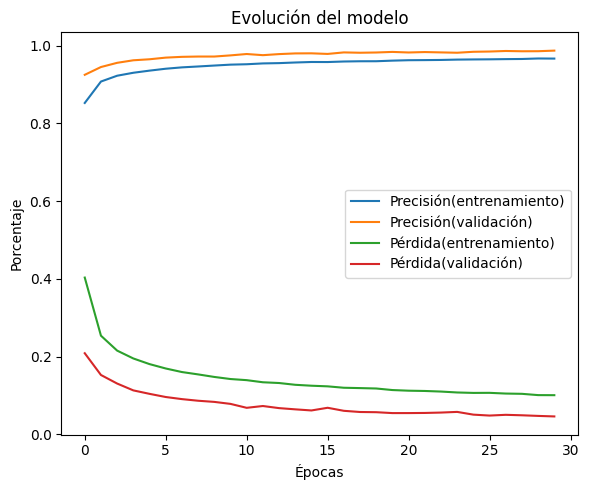

In [113]:
evaluar_modelo('modelo_ann.h5', x_test, y_test, x_val, y_val, history_ann)

# Comparativa de los modelos

In [102]:
def comparar_modelos(historias, nombres_modelos):
    if len(historias) != len(nombres_modelos):
        raise ValueError("El número de historias debe coincidir con el número de nombres de modelos.")

    # Crear gráficas para precisión y pérdida
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Precisión de validación
    for i, history in enumerate(historias):
        axs[0].plot(history['val_accuracy'], label=nombres_modelos[i])
    axs[0].set_title('Comparación de Precisión en Validación')
    axs[0].set_xlabel('Épocas')
    axs[0].set_ylabel('Precisión')
    axs[0].legend()
    axs[0].grid()

    # Pérdida de validación
    for i, history in enumerate(historias):
        axs[1].plot(history['val_loss'], label=nombres_modelos[i])
    axs[1].set_title('Comparación de Pérdida en Validación')
    axs[1].set_xlabel('Épocas')
    axs[1].set_ylabel('Pérdida')
    axs[1].legend()
    axs[1].grid()

    plt.tight_layout()
    plt.show()

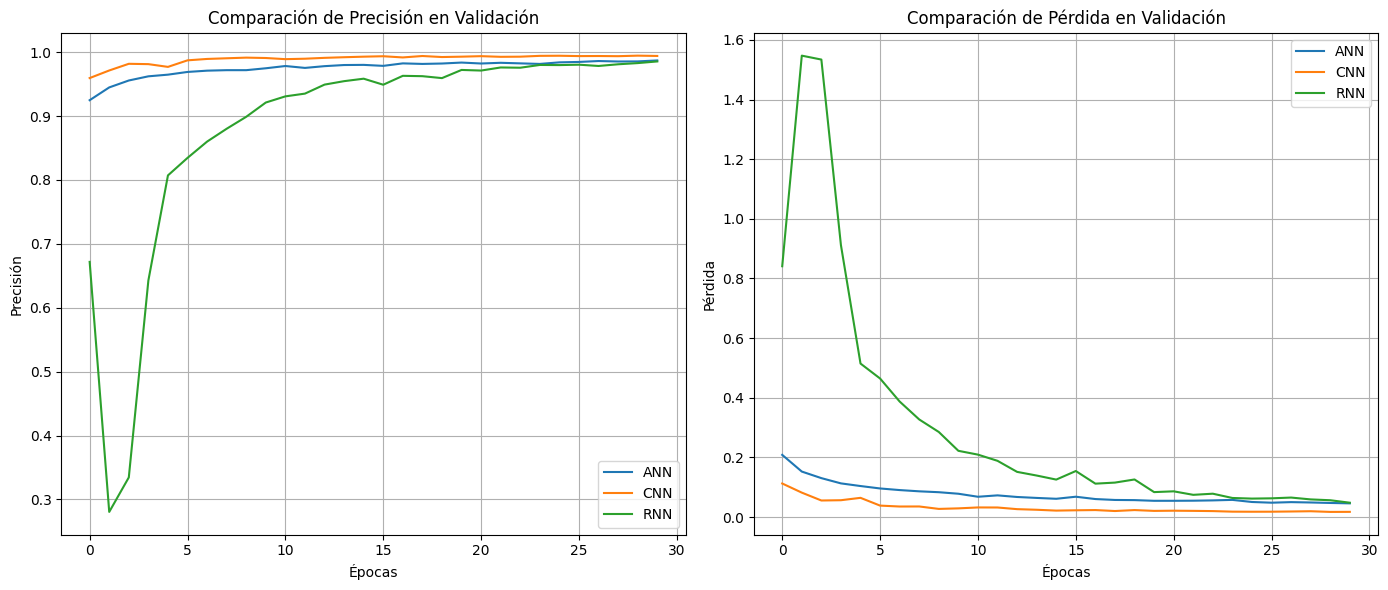

In [104]:
comparar_modelos([history_ann, history_cnn, history_rnn], ['ANN', 'CNN', 'RNN'])

# Predicciones de Prueba

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [23]:
def realizar_pruebas(archivo_modelo, x_test, y_test, num_pruebas=3):
    # Cargar el modelo
    modelo = load_model(archivo_modelo)

    # Seleccionar índices aleatorios del conjunto de prueba
    indices = np.random.choice(len(x_test), size=num_pruebas, replace=False)

    # Realizar predicciones y visualizar resultados
    for i, idx in enumerate(indices):
        muestra = x_test[idx:idx+1]  # Extraer la muestra
        etiqueta_real = np.argmax(y_test[idx])  # Convertir etiqueta real de categórica a numérica
        prediccion = np.argmax(modelo.predict(muestra), axis=1)[0]  # Predicción del modelo

        # Mostrar resultados en la consola
        print(f"Prueba {i + 1}:")
        print(f"  Etiqueta real: {etiqueta_real}")
        print(f"  Predicción del modelo: {prediccion}")
        print("-" * 30)

        # Graficar el ejemplo
        plt.figure(figsize=(10, 4))
        plt.plot(muestra[0, :, 0], label='Señal ECG', color='blue')
        plt.title(f"Prueba {i + 1} - Etiqueta Real: {etiqueta_real} | Predicción: {prediccion}")
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.legend()
        plt.grid()
        plt.show()

# ANN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prueba 1:
  Etiqueta real: 2
  Predicción del modelo: 2
------------------------------


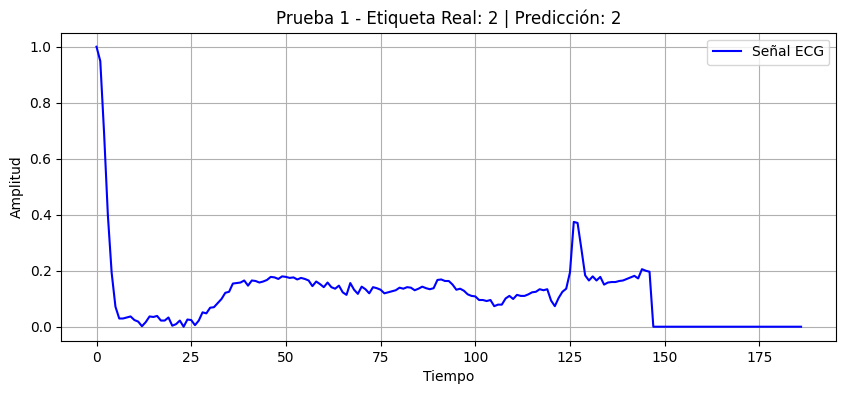

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prueba 2:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


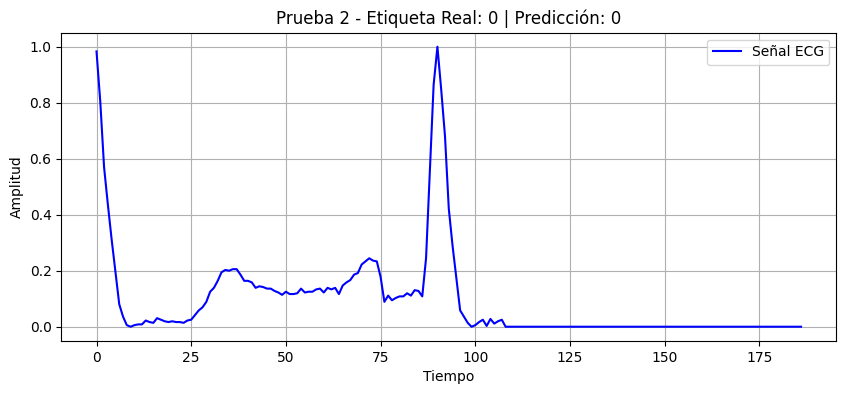

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prueba 3:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


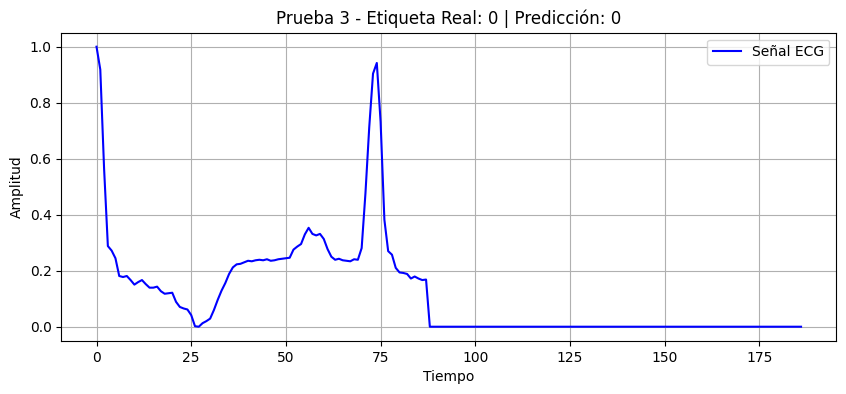

In [25]:
realizar_pruebas('modelo_ann.h5', x_test, y_test, num_pruebas=3)

# CNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Prueba 1:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


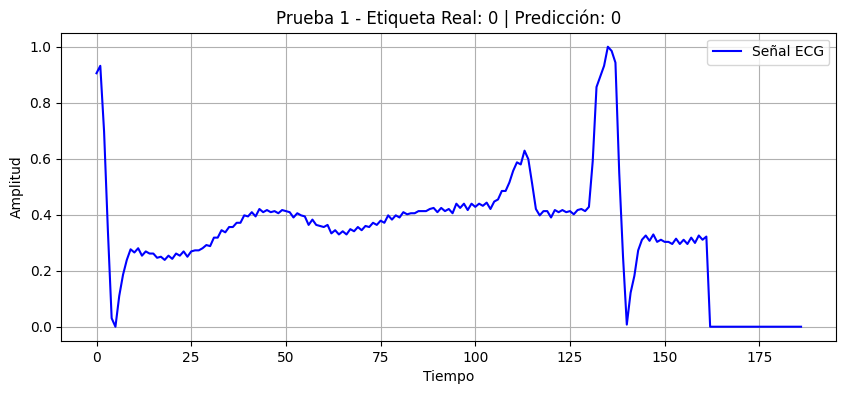

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prueba 2:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


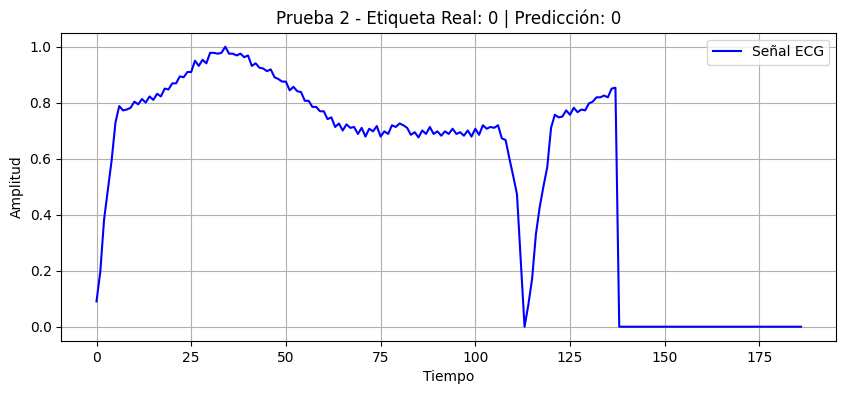

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prueba 3:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


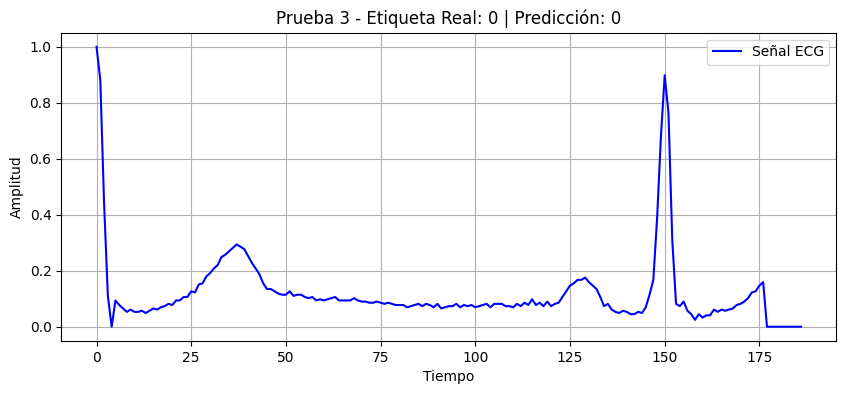

In [26]:
realizar_pruebas('modelo_cnn.h5', x_test, y_test, num_pruebas=3)

# RNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Prueba 1:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


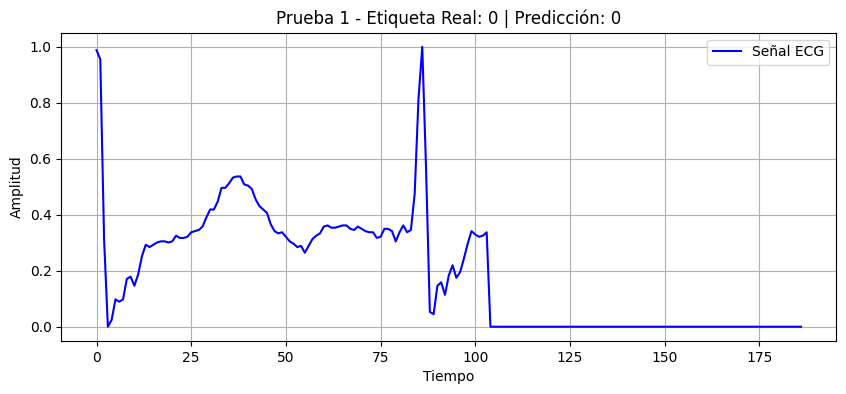

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prueba 2:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


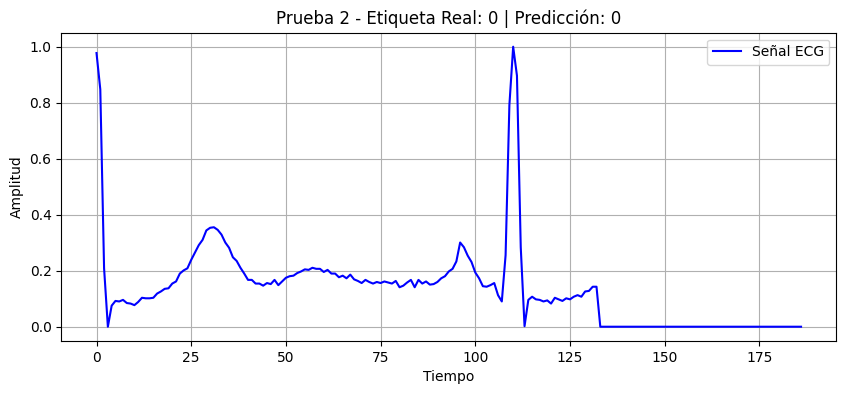

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prueba 3:
  Etiqueta real: 0
  Predicción del modelo: 0
------------------------------


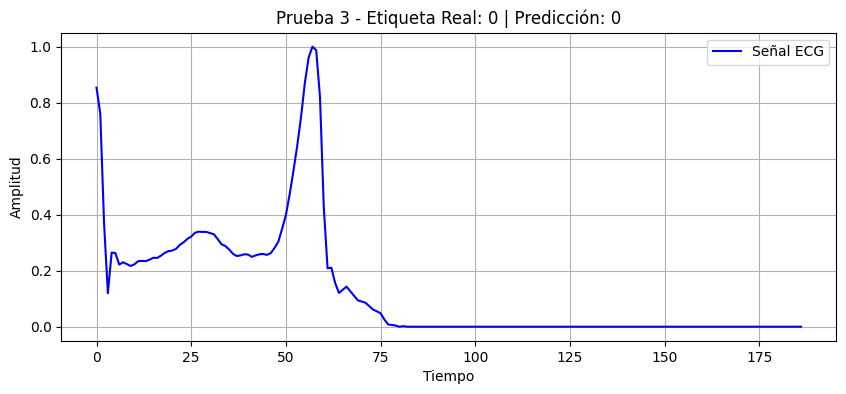

In [24]:
realizar_pruebas('modelo_rnn.h5', x_test, y_test, num_pruebas=3)